<a href="https://colab.research.google.com/github/AshwinRS07/DC_EV-ParkStations/blob/main/UCProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [ ]:
#!pip install folium

In [ ]:
!pip install geopandas


In [ ]:
!pip install pygeohash

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import geopandas as gp
import pandas as pd
import pygeohash as gh
from sklearn import preprocessing, cluster
import scipy
import folium
import geopy

In [ ]:
general_path='/gdrive/MyDrive/Urban Computing Project/'

In [ ]:
CS_dataframe = pd.read_csv('/gdrive/MyDrive/Urban Computing Project/Charging_Stations.csv')

In [ ]:
CS_dataframe.head()

Fuel Type Code  ... Restricted Access
0            E85  ...               NaN
1           ELEC  ...               NaN
2           ELEC  ...               NaN
3           ELEC  ...               NaN
4           ELEC  ...               NaN

[5 rows x 65 columns]

In [ ]:
CS_geoframe = CS_dataframe[['Latitude','Longitude']]#,CS_dataframe['Longitude']#where CS_dataframe['Fuel Type Code'] == 'ELEC'

In [ ]:
CS_geoframe.head()

Latitude  Longitude
0  38.922384 -77.073001
1  38.896703 -77.027621
2  38.874415 -76.992381
3  38.907454 -77.043971
4  38.901780 -77.059732

In [ ]:
PS_dataframe = pd.read_csv('/gdrive/MyDrive/Urban Computing Project/Parking_Meter_Spaces.csv')

In [ ]:
PS_geoframe = PS_dataframe[['LATITUDE','LONGIITUDE']]

In [ ]:
PS_geoframe.head()

LATITUDE  LONGIITUDE
0  38.946984  -77.079243
1  38.946984  -77.079243
2  38.949733  -77.080931
3  38.950785  -77.075617
4  38.950695  -77.075660

In [ ]:
filter = 'ELEC'

In [ ]:
CS_geoframe = CS_dataframe[CS_dataframe["Fuel Type Code"]==filter][["Station Name","Street Address","Longitude","Latitude"]].reset_index(drop=True)
CS_geoframe = CS_geoframe.reset_index().rename(columns={"index":"id"})
CS_geoframe.head()

id                   Station Name    Street Address  Longitude   Latitude
0   0                    One Parking    555 12th St NW -77.027621  38.896703
1   1           Washington Navy Yard  1314 Harwood St. -76.992381  38.874415
2   2               LENKIN CO 1300 B   1300 19th St NW -77.043971  38.907454
3   3         WASH HARBOUR STATION 1      3000 K St NW -77.059732  38.901780
4   4  TISHMAN SPEYER 1875 EYE ST #1      1850 K St NW -77.042764  38.902212

In [ ]:
CS_geoframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              241 non-null    int64  
 1   Station Name    241 non-null    object 
 2   Street Address  241 non-null    object 
 3   Longitude       241 non-null    float64
 4   Latitude        241 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 9.5+ KB


In [ ]:
PS_geoframe = PS_dataframe[["OBJECTID","LONGIITUDE","LATITUDE"]].reset_index(drop=True)

In [ ]:
PS_geoframe

OBJECTID  LONGIITUDE   LATITUDE
0       725915  -77.079243  38.946984
1       725916  -77.079243  38.946984
2       725917  -77.080931  38.949733
3       725918  -77.075617  38.950785
4       725919  -77.075660  38.950695
...        ...         ...        ...
2241    728156  -77.020902  38.888831
2242    728157  -77.021369  38.888821
2243    728158  -77.023722  38.888858
2244    728159  -77.025348  38.889089
2245    728160  -77.026279  38.889117

[2246 rows x 3 columns]

In [ ]:
city = "Washington"
## get location
locator = geopy.geocoders.Nominatim(user_agent="MyCoder")
location = locator.geocode(city)
print(location)
## keep latitude and longitude only
location = [location.latitude, location.longitude]
print("[lat, long]:", location)

Washington, District of Columbia, United States
[lat, long]: [38.8950368, -77.0365427]


In [ ]:
x, y = "Latitude", "Longitude"

data = CS_geoframe.copy()
data2 = PS_geoframe.copy()


## initialize the map with the starting location
map_ = folium.Map(location=location, tiles="cartodbpositron",
                  zoom_start=11)
## add points
data.apply(lambda row: folium.CircleMarker(
           location=[row[x],row[y]],
           color='red', fill=True).add_to(map_), axis=1)
data2.apply(lambda row:folium.CircleMarker(
           location=[row['LATITUDE'],row['LONGIITUDE']],
           color='blue', fill=False).add_to(map_), axis=1)

## plot the map
map_

In [ ]:
'''X = CS_geoframe[["Latitude","Longitude"]]
max_k = 10
## iterations
distortions = [] 
for i in range(1, max_k+1):
    if len(X) >= i:
       model = cluster.KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
       model.fit(X)
       distortions.append(model.inertia_)
## best k: the lowest derivative
k = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i 
     in np.diff(distortions,2)]))
## plot
fig, ax = plt.subplots()
ax.plot(range(1, len(distortions)+1), distortions)
ax.axvline(k, ls='--', color="red", label="k = "+str(k))
ax.set(title='The Elbow Method', xlabel='Number of clusters', 
       ylabel="Distortion")
ax.legend()
ax.grid(True)
plt.show()
'''

'X = CS_geoframe[["Latitude","Longitude"]]\nmax_k = 10\n## iterations\ndistortions = [] \nfor i in range(1, max_k+1):\n    if len(X) >= i:\n       model = cluster.KMeans(n_clusters=i, init=\'k-means++\', max_iter=300, n_init=10, random_state=0)\n       model.fit(X)\n       distortions.append(model.inertia_)\n## best k: the lowest derivative\nk = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i \n     in np.diff(distortions,2)]))\n## plot\nfig, ax = plt.subplots()\nax.plot(range(1, len(distortions)+1), distortions)\nax.axvline(k, ls=\'--\', color="red", label="k = "+str(k))\nax.set(title=\'The Elbow Method\', xlabel=\'Number of clusters\', \n       ylabel="Distortion")\nax.legend()\nax.grid(True)\nplt.show()\n'

In [ ]:
from geopy import distance

In [ ]:
#edges = list(zip(CS_geoframe['Station Name'],PS_geoframe['OBJECTID']))
edges = list()
nodedest = list()
foliumedges = list()

In [ ]:
for index, row in CS_geoframe.iterrows():
  i = 0
  #print(row[4])
  temp = (row[4],row[3])
  #print("Latitude, Longitude:", temp)
  for index2,row2 in PS_geoframe.iterrows():
    #print(row2[0])
    #break
    temp2 = (row2[2],row2[1])
    #print("Latitude, Longitude:", temp2)
    if i > 4:
      break
    if(distance.distance(temp,temp2).km < 0.1): #only counting distances less than 100 meters.
      nodedest.append(row2[0])
      edges.append([temp,temp2])
  nodedest.append(row[1])
    

In [ ]:
print(edges)

[[(38.896703, -77.027621), (38.896208, -77.026678)], [(38.896703, -77.027621), (38.896209000000006, -77.02674499999999)], [(38.896703, -77.027621), (38.896209999999996, -77.027925)], [(38.896703, -77.027621), (38.896051, -77.02756)], [(38.896703, -77.027621), (38.897265999999995, -77.026724)], [(38.896703, -77.027621), (38.897298, -77.027971)], [(38.896703, -77.027621), (38.896776, -77.02691300000001)], [(38.896703, -77.027621), (38.896855, -77.02691300000001)], [(38.896703, -77.027621), (38.8969, -77.02691300000001)], [(38.896703, -77.027621), (38.896964000000004, -77.02691300000001)], [(38.896703, -77.027621), (38.897021, -77.02691300000001)], [(38.896703, -77.027621), (38.897078, -77.02691300000001)], [(38.896703, -77.027621), (38.897125, -77.02691300000001)], [(38.896703, -77.027621), (38.895896, -77.028126)], [(38.896703, -77.027621), (38.897096999999995, -77.028091)], [(38.896703, -77.027621), (38.897095, -77.028214)], [(38.896703, -77.027621), (38.896026, -77.027137)], [(38.8967

In [ ]:
print(nodedest)

[726663.0, 726664.0, 726669.0, 726670.0, 726740.0, 726743.0, 727034.0, 727035.0, 727036.0, 727037.0, 727038.0, 727039.0, 727040.0, 727071.0, 727073.0, 727074.0, 727620.0, 727621.0, 727622.0, 727623.0, 727624.0, 727625.0, 727626.0, 727627.0, 727628.0, 727629.0, 727630.0, 727631.0, 'One Parking', 'Washington Navy Yard', 727150.0, 'LENKIN CO 1300 B', 'WASH HARBOUR STATION 1', 726961.0, 726998.0, 726999.0, 727000.0, 727001.0, 'TISHMAN SPEYER 1875 EYE ST #1', 726506.0, 726963.0, 726964.0, 726965.0, 'TISHMAN SPEYER 1919 PA AVE #1', 726861.0, 726862.0, 726863.0, 726864.0, 726865.0, 726866.0, 726867.0, 726868.0, 726869.0, 726870.0, 726871.0, 726872.0, 726873.0, 726874.0, 726875.0, 726876.0, 726877.0, 726878.0, 726879.0, 726880.0, 726881.0, 726882.0, 726883.0, 726890.0, 726891.0, 726892.0, 726893.0, 726933.0, 726934.0, 727559.0, 727560.0, 727561.0, 727562.0, 727563.0, 727564.0, 727566.0, 727567.0, 727568.0, 727569.0, 727570.0, 727571.0, 727572.0, 727573.0, 727574.0, 727575.0, 727576.0, 'City Ce

In [ ]:
print(len(nodedest))

1208


In [ ]:
print(len(edges))

967


In [ ]:
edgesF=list(zip(CS_geoframe['Station Name'],PS_geoframe['OBJECTID']))

In [ ]:
import networkx as nx
import community
import random

In [ ]:
G_undirected = nx.Graph()

In [ ]:
G_undirected.add_edges_from(edges)

In [ ]:
print('Total number of Charging Stations:',len(list(G_undirected.nodes)))
print('Total number of connections:',len(list(G_undirected.edges)))

Total number of Charging Stations: 701
Total number of connections: 938


In [ ]:
CS_names = list(G_undirected.nodes)
edgelist = list(G_undirected.edges)

In [ ]:
CS_names

[(38.896703, -77.027621),
 (38.896208, -77.026678),
 (38.896209000000006, -77.02674499999999),
 (38.896209999999996, -77.027925),
 (38.896051, -77.02756),
 (38.897265999999995, -77.026724),
 (38.897298, -77.027971),
 (38.896776, -77.02691300000001),
 (38.896855, -77.02691300000001),
 (38.8969, -77.02691300000001),
 (38.896964000000004, -77.02691300000001),
 (38.897021, -77.02691300000001),
 (38.897078, -77.02691300000001),
 (38.897125, -77.02691300000001),
 (38.895896, -77.028126),
 (38.897096999999995, -77.028091),
 (38.897095, -77.028214),
 (38.896026, -77.027137),
 (38.896316999999996, -77.02691300000001),
 (38.896375, -77.02691300000001),
 (38.896594, -77.02691300000001),
 (38.896640000000005, -77.02691300000001),
 (38.896685, -77.02691300000001),
 (38.896926, -77.027126),
 (38.907454, -77.043971),
 (38.906892, -77.04480600000001),
 (38.902212, -77.042764),
 (38.901396000000005, -77.042626),
 (38.902698, -77.041894),
 (38.902584999999995, -77.042028),
 (38.902706, -77.0433),
 (38.9

In [ ]:
edgelist

[((38.896703, -77.027621), (38.896208, -77.026678)),
 ((38.896703, -77.027621), (38.896209000000006, -77.02674499999999)),
 ((38.896703, -77.027621), (38.896209999999996, -77.027925)),
 ((38.896703, -77.027621), (38.896051, -77.02756)),
 ((38.896703, -77.027621), (38.897265999999995, -77.026724)),
 ((38.896703, -77.027621), (38.897298, -77.027971)),
 ((38.896703, -77.027621), (38.896776, -77.02691300000001)),
 ((38.896703, -77.027621), (38.896855, -77.02691300000001)),
 ((38.896703, -77.027621), (38.8969, -77.02691300000001)),
 ((38.896703, -77.027621), (38.896964000000004, -77.02691300000001)),
 ((38.896703, -77.027621), (38.897021, -77.02691300000001)),
 ((38.896703, -77.027621), (38.897078, -77.02691300000001)),
 ((38.896703, -77.027621), (38.897125, -77.02691300000001)),
 ((38.896703, -77.027621), (38.895896, -77.028126)),
 ((38.896703, -77.027621), (38.897096999999995, -77.028091)),
 ((38.896703, -77.027621), (38.897095, -77.028214)),
 ((38.896703, -77.027621), (38.896026, -77.027

In [ ]:
f1=folium.FeatureGroup("OneParking")

In [ ]:
#line_1=folium.vector_layers.PolyLine(edges[0],color='blue',weight=10).add_to(map_)

In [ ]:
#map_

In [ ]:
line = list()

In [ ]:
for i in range(len(edges)):
  folium.vector_layers.PolyLine(edges[i],color='blue',weight=10).add_to(map_)

In [ ]:
map_

In [ ]:
print('Network density:',nx.density(G_undirected))

Network density: 0.0038231098430813125


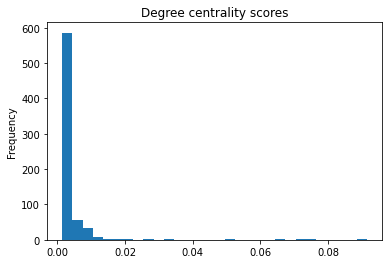

In [ ]:
pd.Series(nx.degree_centrality(G_undirected)).sort_values().plot(kind='hist',bins=30,title="Degree centrality scores")

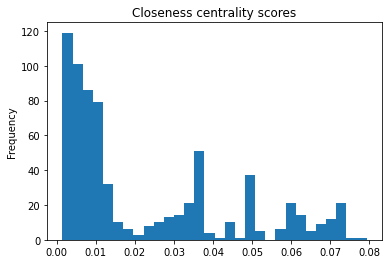

In [ ]:
pd.Series(nx.closeness_centrality(G_undirected)).sort_values().plot(kind='hist',bins=30,title="Closeness centrality scores")

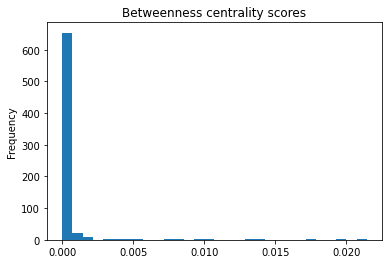

In [ ]:
pd.Series(nx.betweenness_centrality(G_undirected)).sort_values().plot(kind='hist',bins=30,title="Betweenness centrality scores")

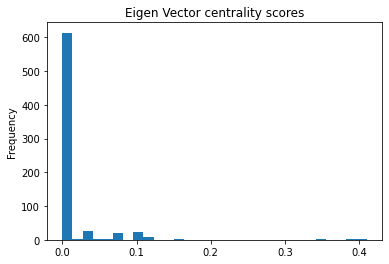

In [ ]:
pd.Series(nx.eigenvector_centrality(G_undirected)).sort_values().plot(kind='hist',bins=30,title="Eigen Vector centrality scores")

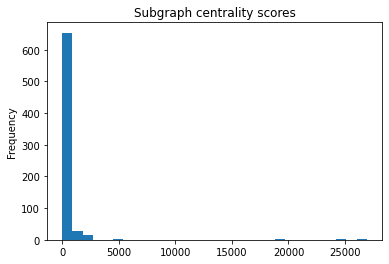

In [ ]:
pd.Series(nx.subgraph_centrality(G_undirected)).sort_values().plot(kind='hist',bins=30,title="Subgraph centrality scores")

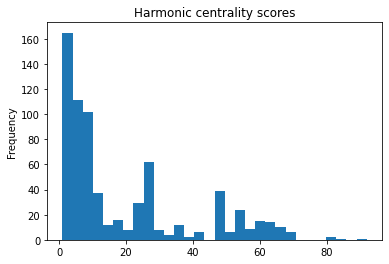

In [ ]:
pd.Series(nx.harmonic_centrality(G_undirected)).sort_values().plot(kind='hist',bins=30,title="Harmonic centrality scores")

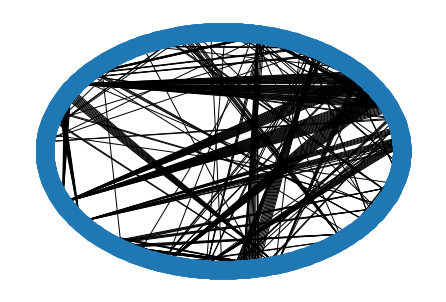

In [ ]:
nx.draw_circular(G_undirected)